<a href="https://colab.research.google.com/github/Durjoy001/Machine_Learning_Lab/blob/main/CNN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/AILabFinal'
!unzip CNN_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/009317.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: CNN_dataset/CXR/002808.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: CNN_dataset/CXR/000835.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: CNN_dataset/CXR/001727.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: CNN_dataset/CXR/004525.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: CNN_dataset/CXR/006518.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._006518.jpeg  
  inflating: CNN_dataset/CXR/008855.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._008855.jpeg  
  inflating: CNN_dataset/CXR/009747.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009747.jpeg  
  inflating: CNN_dataset/CXR/001377.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001377.jpeg  
  inflating: CNN_dataset/CXR/004175.jpeg  
  inflating: __MACOSX/CNN_dataset

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

dir_path = '/content/drive/MyDrive/AILabFinal/CNN_dataset'

train_split = 0.75
val_split = 0.1
test_split = 0.15

images = []
labels = []

class_names = ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [4]:
for i, class_name in enumerate(class_names):
  class_path = os.path.join(dir_path, class_name)
  for img_name in os.listdir(class_path):
      img_path = os.path.join(class_path, img_name)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (64, 64))
      images.append(img)
      labels.append(i)

In [5]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=test_split, stratify=labels, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_split/(train_split-val_split),
    stratify=y_train, random_state=42)

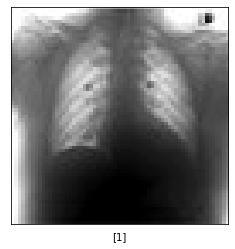

In [7]:
import matplotlib.pyplot as plt

plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[4]])
plt.imshow(x_train[4],cmap=plt.cm.binary)

In [8]:
x_train /= 255.
x_val /= 255.
x_test /= 255.

In [9]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [10]:
import tensorflow as tf
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
x_train = x_train.reshape(-1,64, 64,1) #Reshape for CNN 
x_test = x_test.reshape(-1,64, 64, 1)
x_train.shape

(35961, 64, 64, 1)

In [16]:
model_log=model.fit(x_train, y_train,
          batch_size=80,
          epochs=5,
          verbose=1,
          validation_split=.3)

Epoch 1/5
315/315 [==============================] - 265s 840ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.0877 - val_accuracy: 0.9625
Epoch 2/5
315/315 [==============================] - 239s 757ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0072 - val_accuracy: 0.9983
Epoch 3/5
315/315 [==============================] - 236s 748ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0061 - val_accuracy: 0.9982
Epoch 4/5
315/315 [==============================] - 239s 759ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0044 - val_accuracy: 0.9986
Epoch 5/5
315/315 [==============================] - 241s 763ms/step - loss: 0.0137 - accuracy: 0.9966 - val_loss: 0.0182 - val_accuracy: 0.9940


In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9934666752815247


In [18]:
predictions = model.predict(x_test)
predictions[0]

235/235 [==============================] - 13s 56ms/step


array([4.3852894e-16, 9.9999994e-01, 4.8633364e-10, 1.5670331e-08,
       1.5007231e-18], dtype=float32)

In [19]:
np.argmax(predictions[0])

1

In [20]:
x_test = x_test.reshape(-1, 64, 64)
x_test.shape

(7500, 64, 64)

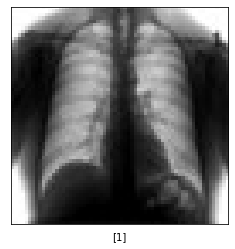

In [21]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_test[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)

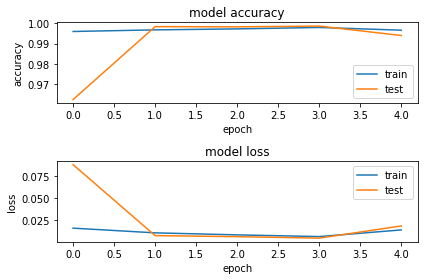

In [22]:
import os
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()